***Тема курсового проекта: "Спрогнозировать количество к заказу с помощью модели линейной регрессии y_hat = b0 + b1*x1 + b2*x2 + ... bn*xn матричным способом"***

**Описание датасета**

* **НомерЗаказа**     - номер документа Автозаказ в программе 1с
* **ГодЗаказа**       - год из поля дата документа Автозаказ
* **МесяцЗаказа**     - месяц из поля дата документа Автозаказ
* **ДеньЗаказа**      - день из поля дата документа Автозаказ
* **НеделяЗаказа**    - номер недели из поля дата документа Автозаказ
* **КодТовара**       - код товара, количество которого необходимо заказать (из табличной части документа Автозаказ)
* **ЦЕНА_ЗКП_РУБ**    - цена закупочная в рублях
* **СРОК_ГДН_ОСТ_Д**  - срок годности остаточный, в днях
* **ОСТ_ТЕК_ШТ**      - текущий остаток в шт/кг
* **ТОВ_В_ПУТ_СУМ_ШТ**- товара в пути в шт/кг
* **ПРДЖ_СР_ШТ_ДО**   - продажи средние шт/кг
* **КВО_ПРДЖ_БАЗА_ШТ**- продажи базовые в шт
* **ПРДЖ_БАЗА_СР_ШТ** - продажи, базовые, средние, шт/кг
* **ППП_ДЛН_Д**       - период покрытия продаж длительность дней
* **ТРБ_МАГ_КВНТ_ШТ** - требование магазина, квант, шт/кг
* **ПРДЖ_ШТ_НЕД**     - недельные продажи 
* **СПИС_ШТ_НЕД**     - недельные списания 

* **ЗКЗ_ИТГ_ШТ**    - количество к заказу, наша целевая переменная, которую мы будем пытаться предсказать

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Order1c_pred.csv')
df.head()

,НомерЗаказа,ГодЗаказа,МесяцЗаказа,ДеньЗаказа,НеделяЗаказа,КодТовара,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ
0,M3300009893,2018,4,24,17,389 965,67.85,245,21.0,0.0,0.68421,3,5.50612,14,6.0,2.0,0.0,6.0
1,M3300009893,2018,4,24,17,389 970,36.03,245,14.0,0.0,0.45714,5,3.28168,14,12.0,3.0,0.0,12.0
2,M3300009893,2018,4,24,17,366 976,30.54,482,12.0,0.0,0.31428,5,2.20001,14,6.0,0.0,0.0,6.0
3,M3300009893,2018,4,24,17,367 448,46.40,241,11.0,0.0,0.10345,4,0.79365,14,10.0,0.0,1.0,10.0
4,M3300009893,2018,4,24,17,260 461,50.92,245,12.0,0.0,0.39999,5,2.62693,14,12.0,4.0,0.0,12.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659803 entries, 0 to 659802
Data columns (total 18 columns):
НомерЗаказа         659803 non-null object
ГодЗаказа           659803 non-null int64
МесяцЗаказа         659803 non-null int64
ДеньЗаказа          659803 non-null int64
НеделяЗаказа        659803 non-null int64
КодТовара           659803 non-null object
ЦЕНА_ЗКП_РУБ        659803 non-null float64
СРОК_ГДН_ОСТ_Д      659803 non-null int64
ОСТ_ТЕК_ШТ          659803 non-null float64
ТОВ_В_ПУТ_СУМ_ШТ    659803 non-null float64
ПРДЖ_СР_ШТ_ДО       659803 non-null float64
КВО_ПРДЖ_БАЗА_ШТ    659803 non-null int64
ПРДЖ_БАЗА_СР_ШТ     659803 non-null float64
ППП_ДЛН_Д           659803 non-null int64
ТРБ_МАГ_КВНТ_ШТ     659803 non-null float64
ПРДЖ_ШТ_НЕД         659803 non-null float64
СПИС_ШТ_НЕД         659803 non-null float64
ЗКЗ_ИТГ_ШТ          659803 non-null float64
dtypes: float64(9), int64(7), object(2)
memory usage: 90.6+ MB


In [5]:
df = df.select_dtypes(include = ['float64', 'int64'])
df.head()

,ГодЗаказа,МесяцЗаказа,ДеньЗаказа,НеделяЗаказа,ЦЕНА_ЗКП_РУБ,СРОК_ГДН_ОСТ_Д,ОСТ_ТЕК_ШТ,ТОВ_В_ПУТ_СУМ_ШТ,ПРДЖ_СР_ШТ_ДО,КВО_ПРДЖ_БАЗА_ШТ,ПРДЖ_БАЗА_СР_ШТ,ППП_ДЛН_Д,ТРБ_МАГ_КВНТ_ШТ,ПРДЖ_ШТ_НЕД,СПИС_ШТ_НЕД,ЗКЗ_ИТГ_ШТ
0,2018,4,24,17,67.85,245,21.0,0.0,0.68421,3,5.50612,14,6.0,2.0,0.0,6.0
1,2018,4,24,17,36.03,245,14.0,0.0,0.45714,5,3.28168,14,12.0,3.0,0.0,12.0
2,2018,4,24,17,30.54,482,12.0,0.0,0.31428,5,2.20001,14,6.0,0.0,0.0,6.0
3,2018,4,24,17,46.40,241,11.0,0.0,0.10345,4,0.79365,14,10.0,0.0,1.0,10.0
4,2018,4,24,17,50.92,245,12.0,0.0,0.39999,5,2.62693,14,12.0,4.0,0.0,12.0


Посмотрите, какие предикторы коррелируют с игреком, а какие нет. Оставить, которые коррелируют. Также уберите те предикторы, которые коррелируют c теми, что в модель включены. 

In [6]:
y = df.iloc[:,-1].values
y

array([ 6., 12.,  6., ...,  6.,  2.,  9.])

In [7]:
np.corrcoef(df['ЦЕНА_ЗКП_РУБ'].values, y)

array([[ 1.        , -0.05842335],
       [-0.05842335,  1.        ]])

In [8]:
np.corrcoef(df['СРОК_ГДН_ОСТ_Д'].values, y)

array([[ 1.00000000e+00, -2.73910469e-04],
       [-2.73910469e-04,  1.00000000e+00]])

In [9]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, y)

array([[1.        , 0.69014253],
       [0.69014253, 1.        ]])

In [11]:
np.corrcoef(df['ПРДЖ_СР_ШТ_ДО'].values, y)

array([[1.        , 0.57512423],
       [0.57512423, 1.        ]])

In [12]:
np.corrcoef(df['КВО_ПРДЖ_БАЗА_ШТ'].values, y)

array([[1.        , 0.03643546],
       [0.03643546, 1.        ]])

In [13]:
np.corrcoef(df['ПРДЖ_БАЗА_СР_ШТ'].values, y)

array([[1.        , 0.57687704],
       [0.57687704, 1.        ]])

In [14]:
np.corrcoef(df['ППП_ДЛН_Д'].values, y)

array([[1.       , 0.0988474],
       [0.0988474, 1.       ]])

In [15]:
np.corrcoef(df['ТРБ_МАГ_КВНТ_ШТ'].values, y)

array([[1.        , 0.90938257],
       [0.90938257, 1.        ]])

In [16]:
np.corrcoef(df['ПРДЖ_ШТ_НЕД'].values, y)

array([[1.        , 0.44213608],
       [0.44213608, 1.        ]])

In [17]:
np.corrcoef(df['СПИС_ШТ_НЕД'].values, y)

array([[1.        , 0.04971807],
       [0.04971807, 1.        ]])

С y коррелируют более 0,5 следующие предикторы: ОСТ_ТЕК_ШТ, ПРДЖ_СР_ШТ_ДО, ПРДЖ_БАЗА_СР_ШТ, ТРБ_МАГ_КВНТ_ШТ.
    Посмотрим, как эти предикторы коррелируют между собой

In [19]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, df['ПРДЖ_СР_ШТ_ДО'].values)

array([[1.        , 0.71652766],
       [0.71652766, 1.        ]])

In [20]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, df['ПРДЖ_БАЗА_СР_ШТ'].values)

array([[1.        , 0.71938291],
       [0.71938291, 1.        ]])

In [21]:
np.corrcoef(df['ОСТ_ТЕК_ШТ'].values, df['ТРБ_МАГ_КВНТ_ШТ'].values)

array([[1.        , 0.61749227],
       [0.61749227, 1.        ]])

In [33]:
y.shape

(659803,)

In [34]:
y = y.reshape(659803, 1)
y

array([[ 6.],
       [12.],
       [ 6.],
       ...,
       [ 6.],
       [ 2.],
       [ 9.]])

In [35]:
y.shape

(659803, 1)

In [35]:
X = df.loc[:,['ПРДЖ_СР_ШТ_ДО', 'ТРБ_МАГ_КВНТ_ШТ']].values
X

array([[ 0.68421,  6.     ],
       [ 0.45714, 12.     ],
       [ 0.31428,  6.     ],
       ...,
       [ 0.0835 ,  3.     ],
       [ 0.06262,  2.     ],
       [ 0.59459,  9.     ]])

In [36]:
X.shape

(659803, 2)

In [37]:
X = np.hstack([np.ones((659803, 1)), X])
X

array([[ 1.     ,  0.68421,  6.     ],
       [ 1.     ,  0.45714, 12.     ],
       [ 1.     ,  0.31428,  6.     ],
       ...,
       [ 1.     ,  0.0835 ,  3.     ],
       [ 1.     ,  0.06262,  2.     ],
       [ 1.     ,  0.59459,  9.     ]])

In [38]:
X.shape

(659803, 3)

In [39]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)
B

array([-0.95057168,  3.01613258,  1.09870565])

In [40]:
B.shape

(3,)

In [41]:
df2 = pd.DataFrame(data=y, columns=['y'])
df2['y_hat'] = np.dot(X, B)
df2.head(20)

,y,y_hat
0,6.0,7.705330
1,12.0,13.612691
2,6.0,6.589572
3,10.0,10.348504
4,12.0,13.440319
5,12.0,7.537483
6,15.0,16.564094
7,6.0,2.776430
8,3.0,2.604058
9,48.0,32.484680


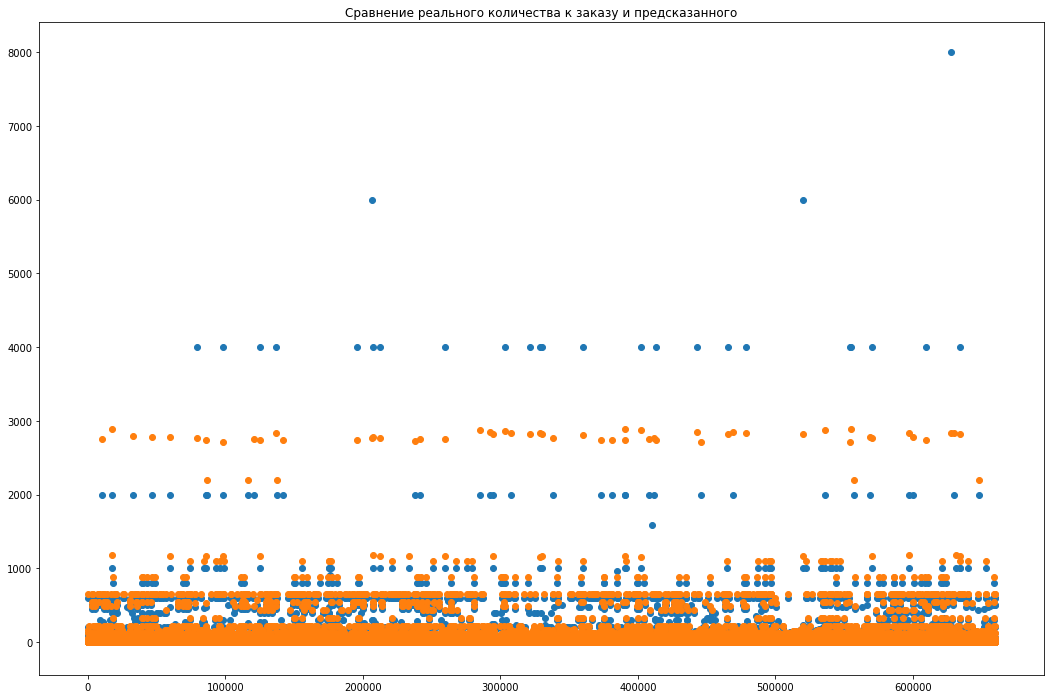

In [42]:
from pylab import rcParams

rcParams["figure.figsize"] = 18, 12

plt.scatter(df2.index, df2['y'])
plt.scatter(df2.index, df2['y_hat'])
plt.title("Сравнение реального количества к заказу и предсказанного")
plt.show()

In [43]:
mse = ((y-np.dot(X, B))**2).sum()/659803
mse

218.73010407551692

In [44]:
A_mean = 100 * np.mean(np.abs((y - np.dot(X, B)) / y))
A_mean

58.16637593750193

Проверим, является ли полученная модель статистически значимой с помощью критерия Фишера. Установим уровень значимости альфа = 0,05. 
* 1) H0: модель не является статистически значимой
* 2) H1: модель является статистически значимой

In [21]:
n = 659803
p = 17
alpha = 0.05

In [22]:
df1 = p - 1
df1

16

In [23]:
df2 = n - p
df2

659786

In [25]:
SSf = ((np.dot(X, B) - y.mean())**2).sum()
SSf

880105113.1265177

In [26]:
SSo = ((y-np.dot(X, B))**2).sum()
SSo

138238565.96820495

In [27]:
MSf = SSf / df1
MSf

55006569.57040735

In [28]:
MSo = SSo / df2
MSo

209.5203080517091

In [29]:
Fp = MSf / MSo
Fp

262535.74215265026

In [ ]:
Ft = 1.75

Fp > Ft модель является статистически значимой на уровне значимости альфа = 0,05

In [31]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [30]:
import pylab
import matplotlib.dates
from pylab import rcParams


import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import Image, display, HTML

In [32]:
df = pd.read_csv('Order1c_pred.csv')

In [46]:
def plot_up_to(year, goods):   
    result = df.query(f'(КодТовара == "{goods}") & (ГодЗаказа == "{year}")')
    xdata = result['НеделяЗаказа']
    ydata = result['ЗКЗ_ИТГ_ШТ']
    rcParams["figure.figsize"] = 10, 8

    plt.scatter(xdata,ydata)
    plt.title('Количество к заказу товара по неделям')
    plt.show()

_ = interact(plot_up_to, year=widgets.Dropdown(options=list(df["ГодЗаказа"].unique()), value=2018, description='Год заказа:'), 
             goods=widgets.Dropdown(options=list(df["КодТовара"].unique()), description='Код товара:'))

interactive(children=(Dropdown(description='Год заказа:', options=(2018, 2016, 2017, 2015), value=2018), Dropd…